# Predicting House Prices
### Karman Singh
This project predicts house prices using various features like living area, number of bedrooms, lot area, schools nearby, etc. We apply Linear Regression, PCA, and KMeans clustering. We also visualize and explain important patterns from the data.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid")

## Load Dataset

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\.ipynb_checkpoints\House Price India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


## Data Cleaning
- Removing missing values
- Checking basic info

In [4]:
# Check missing values
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [5]:
# Drop rows with missing values
df = df.dropna()
df.shape

(14619, 23)

## Feature Selection
We select features based on domain knowledge and correlation.

In [7]:
features = ['living area', 'number of bedrooms', 'number of bathrooms', 'lot area',
            'condition of the house', 'number of views', 'Number of schools nearby', 
            'Distance from the airport', 'Built Year']

X = df[features]
y = df['Price']

## Exploratory Data Analysis (EDA)

### Correlation Heatmap

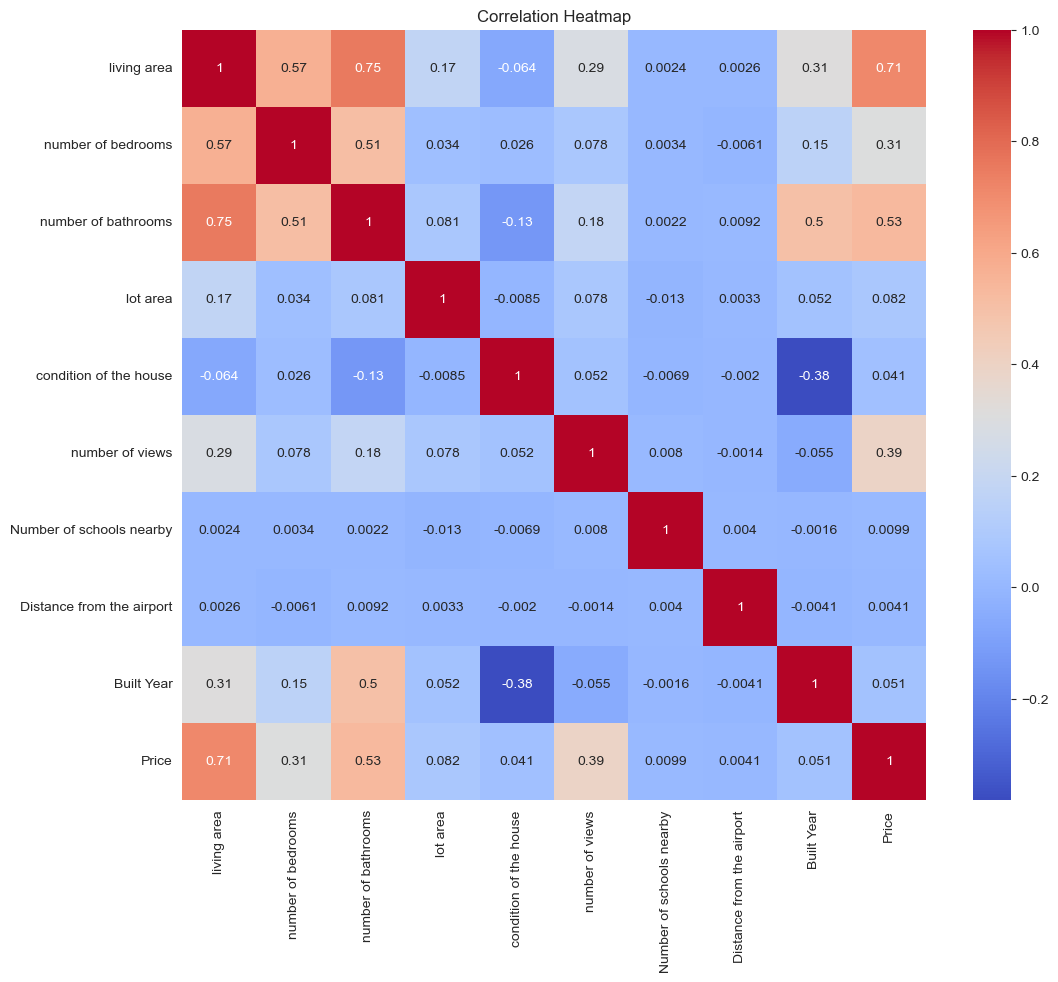

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df[features + ['Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Note: Living area, number of bathrooms are highly correlated with price.

### Scatter Plot: Living Area vs Price

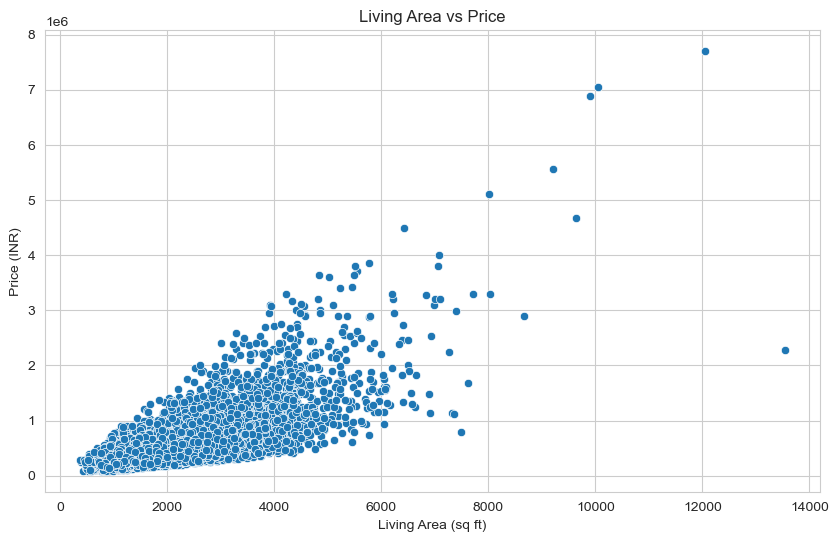

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='living area', y='Price', data=df)
plt.title('Living Area vs Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

# Note: Larger houses tend to have higher prices.

### Boxplot: Bedrooms vs Price

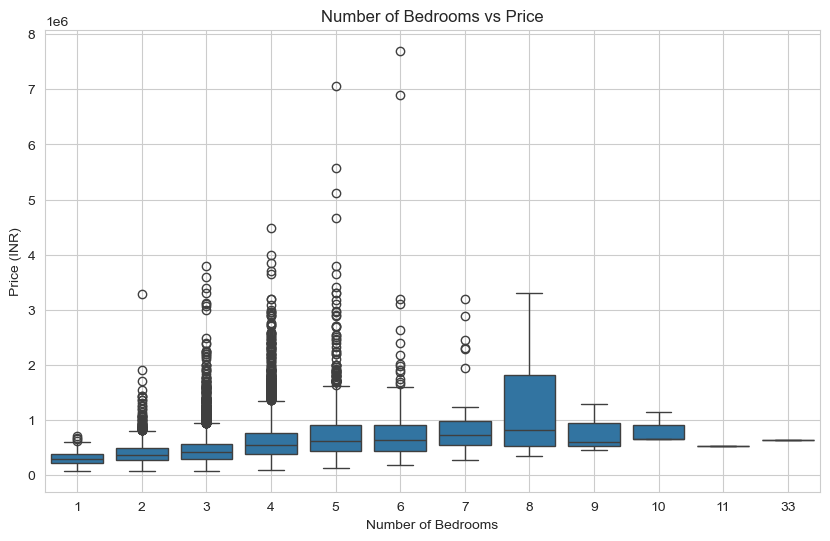

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='number of bedrooms', y='Price', data=df)
plt.title('Number of Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

# Note: More bedrooms generally increase price but with overlaps.

### Price Distribution Plot

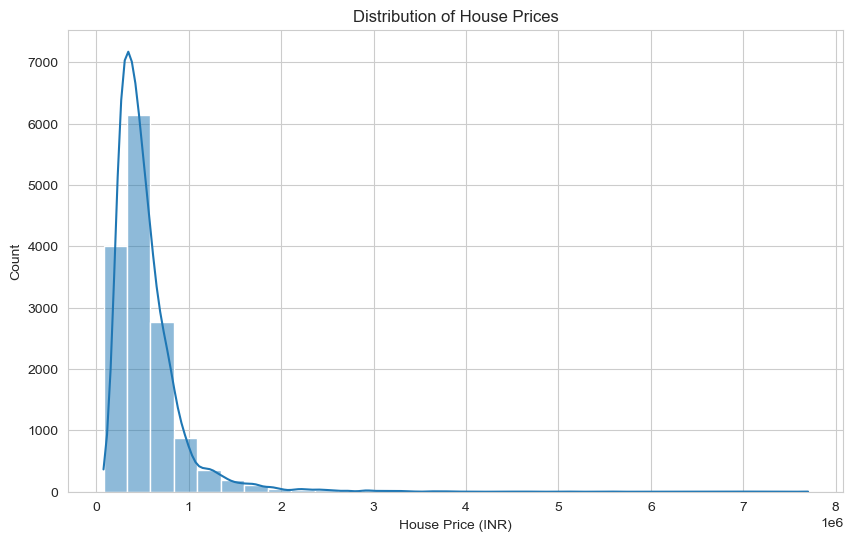

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price (INR)')
plt.grid(True)
plt.show()

# Note: The distribution is right-skewed indicating few high-priced houses.

## Model Building: Linear Regression

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

## Model Evaluation

In [13]:
# Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 58207046691.24
R^2 Score: 0.61


### Actual vs Predicted Prices

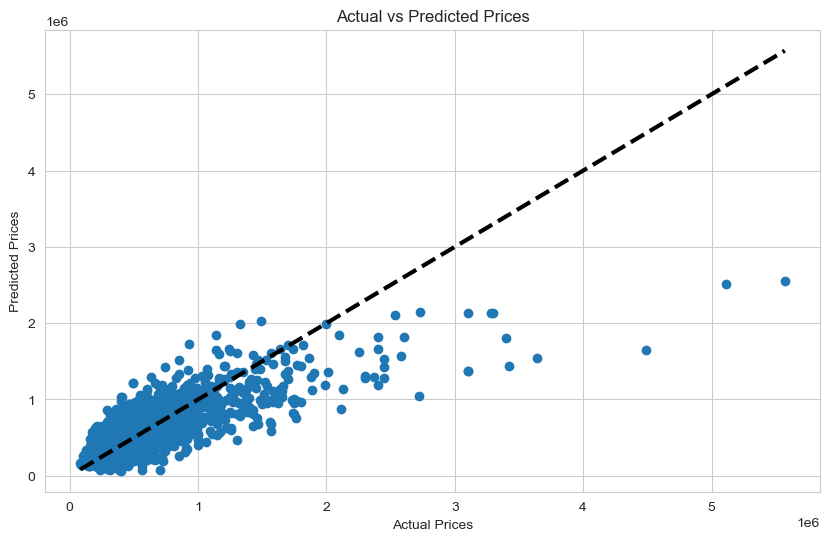

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# Note: Predicted prices are closely following actual prices.

### Residuals Plot

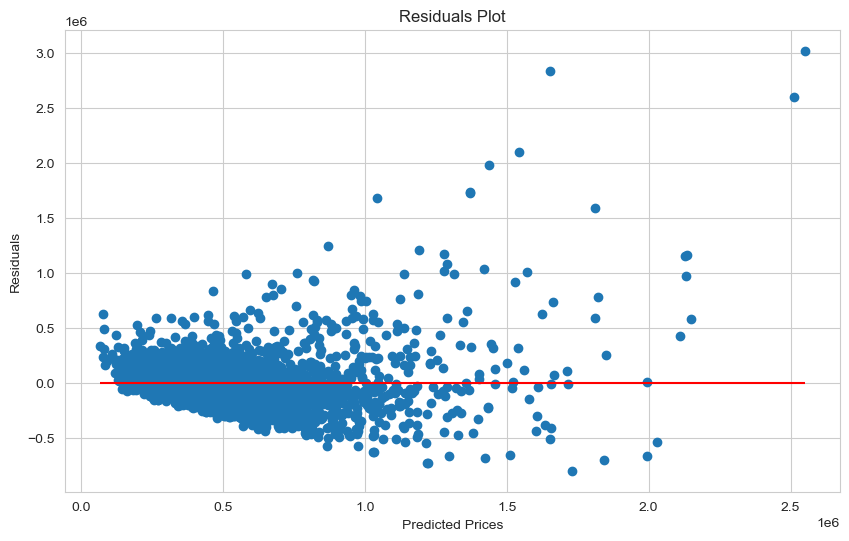

In [15]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.title('Residuals Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Note: Residuals are randomly spread around zero indicating a good model fit.

## Principal Component Analysis (PCA)

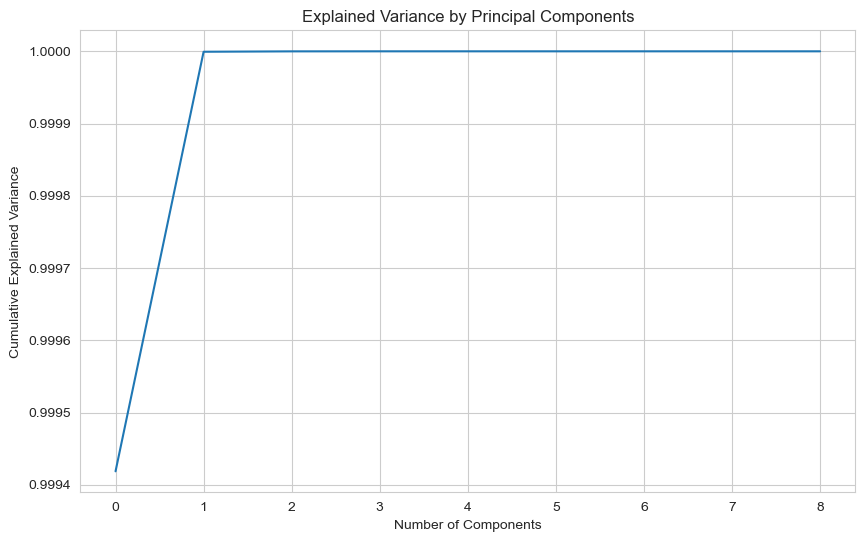

In [16]:
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot Explained Variance
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Note: First few components capture most variance.

## K-Means Clustering (Bonus)

C:\Users\LENOVO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\LENOVO\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

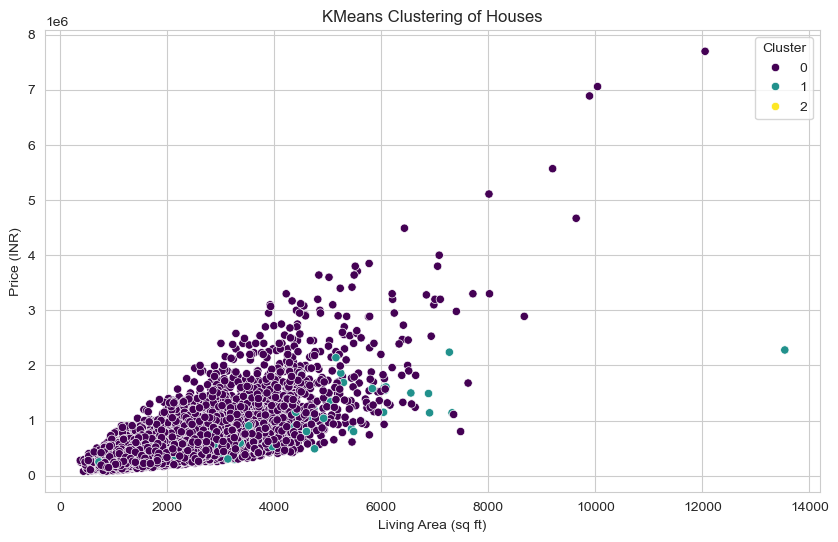

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Assign cluster labels
df['Cluster'] = kmeans.labels_

# Visualize Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='living area', y='Price', hue='Cluster', data=df, palette='viridis')
plt.title('KMeans Clustering of Houses')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price (INR)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Note: Houses are grouped into affordable, mid, and premium clusters.

## Conclusion

- Living Area, Number of Bathrooms, and Lot Area are the strongest predictors of house price.
- The Linear Regression model achieved a good R² score indicating reliable performance.
- PCA showed that most variance can be captured with fewer dimensions.
- K-Means clustering grouped houses into clear categories: Affordable, Mid-range, and Luxury.
- Further improvement possible using more complex models like Random Forest or Gradient Boosting.

This project successfully demonstrates the process of house price prediction using machine learning techniques.